# **Advertising Sales ( Linear Regression )**

**The advertising dataset captures the sales revenue generated with respect to advertisement costs across multiple channels like radio, tv, and newspapers. It is required to understand the impact of ad budgets on the overall sales.**

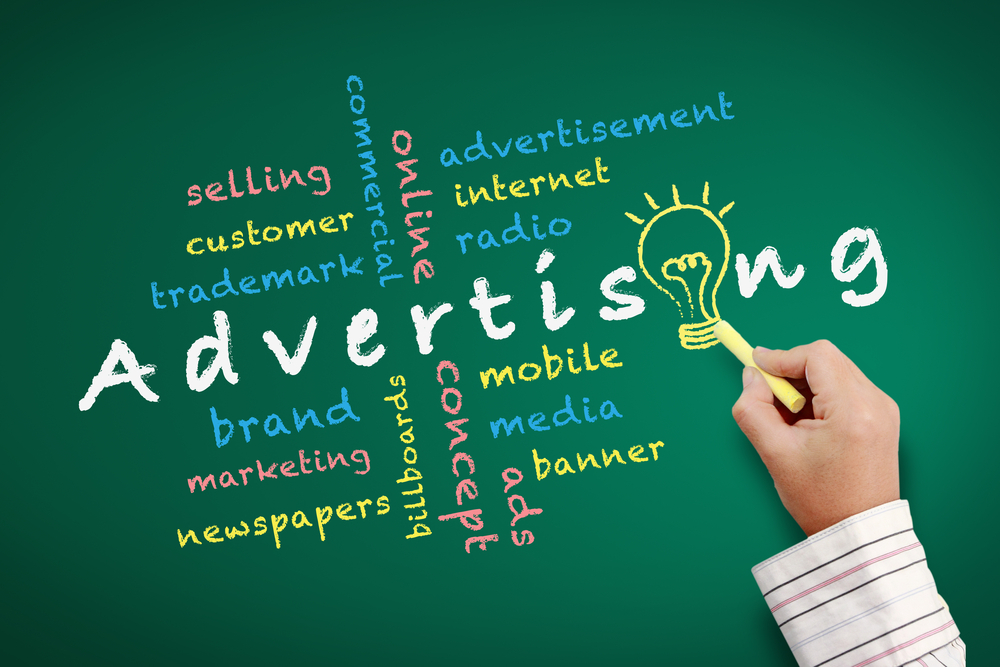


# **Exploratory Data Analysis**

In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load dataset
df=pd.read_csv('/kaggle/input/advertising-sales-dataset/Advertising Budget and Sales.csv')
df.head(5)

,Unnamed: 0,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($),Sales ($)
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [3]:
df.drop('Unnamed: 0',axis=1,inplace=True)
df.columns = ['TV', 'Radio', 'Newspaper', 'Sales']
df.head(10)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
5,8.7,48.9,75.0,7.2
6,57.5,32.8,23.5,11.8
7,120.2,19.6,11.6,13.2
8,8.6,2.1,1.0,4.8
9,199.8,2.6,21.2,10.6


In [4]:
#information about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


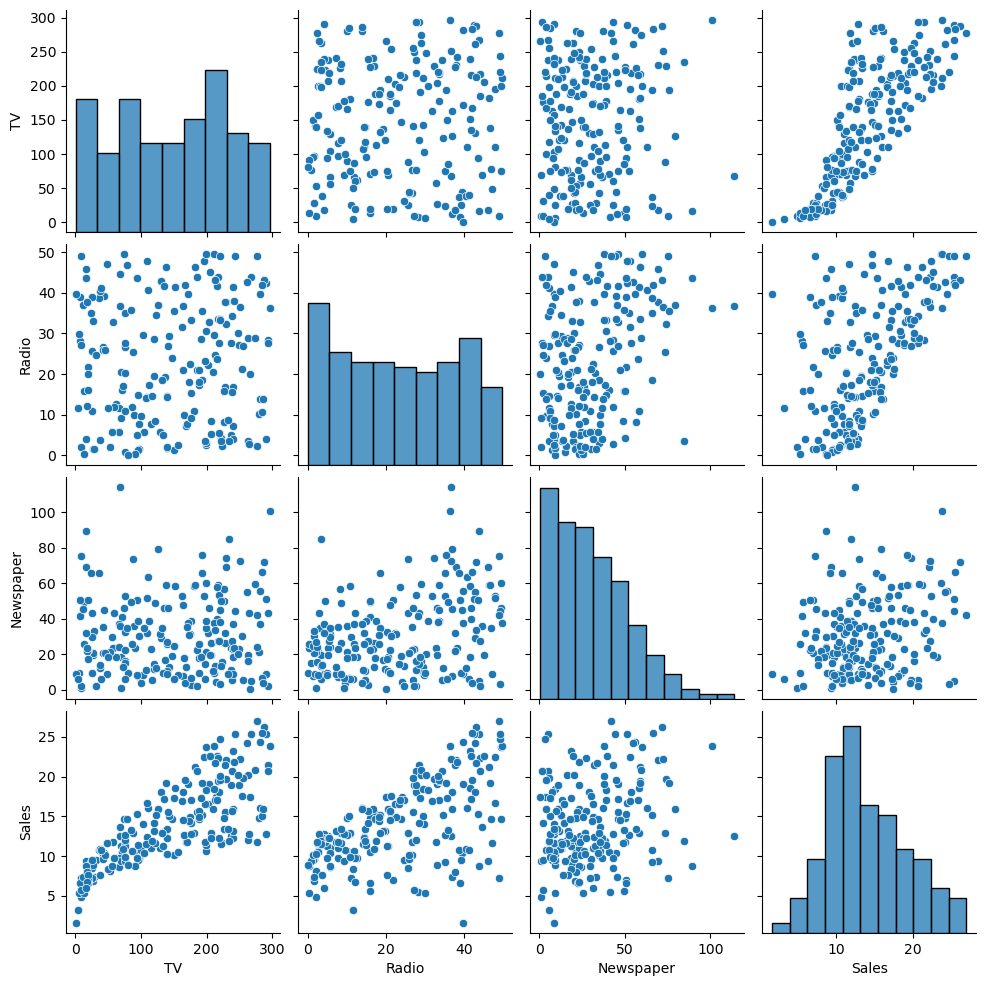

In [5]:
# Plotting the distribution of columns
sns.pairplot(df)

<AxesSubplot:>

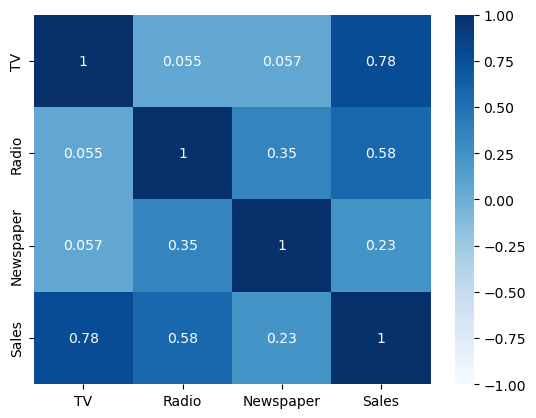

In [6]:
sns.heatmap(df.corr(),vmin=-1,vmax=1,cmap='Blues',annot=True)

Text(0.5, 1.0, 'The Regression Line Of ad Newspaper Vs Sales')

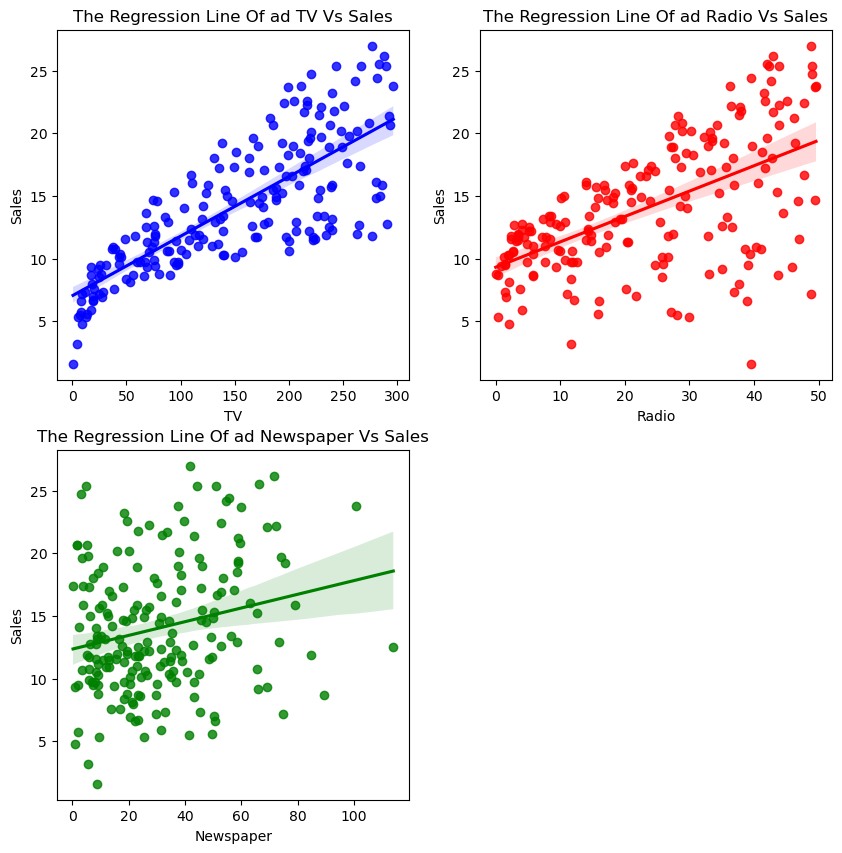

In [7]:
# Plotting the regression line
from matplotlib import figure
plt.figure(figsize =(10,10))
plt.subplot(2,2,1)
sns.regplot(data=df,x='TV',y='Sales',color='b').set_title('The Regression Line Of ad TV Vs Sales')
plt.subplot(2,2,2)
sns.regplot(data=df,x='Radio',y='Sales',color='r').set_title('The Regression Line Of ad Radio Vs Sales')
plt.subplot(2,2,3)
sns.regplot(data=df,x='Newspaper',y='Sales',color='g').set_title('The Regression Line Of ad Newspaper Vs Sales')

# Features selection

In [8]:
# Features selection
x=df[['TV','Radio','Newspaper']]
y=df['Sales']

# Creating The Model

In [9]:
# Split dataset into training set and test set
from sklearn.model_selection import train_test_split
#using function train_test_split()
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

print(f'x_train : {x_train.shape}')
print(f'y_train : {y_train.shape}')
print(f'x_test : {x_test.shape}')
print(f'y_test : {y_test.shape}')

x_train : (160, 3)
y_train : (160,)
x_test : (40, 3)
y_test : (40,)


In [10]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [11]:
# Create LinearRegression object
reg=LinearRegression()
# train model
reg.fit(x_train,y_train)

LinearRegression()

In [12]:
#Predict the response for test dataset
pred=reg.predict(x_test)

In [13]:
# Actual Vs Predicted
ac = pd.DataFrame({'Actual': y_test, 'Predicted': pred})  
ac.head(10)

,Actual,Predicted
18,11.3,10.057396
170,8.4,7.452281
107,8.7,7.019708
98,25.4,24.080297
177,11.7,12.017863
182,8.7,6.537939
5,7.2,12.782869
146,13.2,15.109746
12,9.2,10.769740
152,16.6,16.343580


# **Evaluating the model**

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. 

In [14]:
# Accuracy of Model
print(f'Accuracy : {reg.score(x_test,y_test)*100} %')

Accuracy : 86.01145185017867 %


In [15]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, pred)) 

Mean Absolute Error: 1.361781350209028
